## DATA WRANGLING

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis


# Load data
df = pd.read_csv('employee_data1.csv')

# 1. Pahami Tujuan
# Contoh: Memprediksi turnover karyawan

# 2. Eksplorasi Awal
print(df.head())

# 3. Cek Struktur dan Tipe Data
print(df.dtypes)
print(df.shape)

# 4. Statistik Deskriptif
print(df.describe())
print(df['Gender'].value_counts())

# Pilih kolom numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(12, 6))

    # Histogram dan KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram and KDE of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    plt.show()

    # Skewness dan Kurtosis
    skewness = skew(df[col].dropna())
    kurt = kurtosis(df[col].dropna())
    print(f'{col} - Skewness: {skewness:.2f}, Kurtosis: {kurt:.2f}')


# 5. Deteksi Missing Values
print(df.isnull().sum())

# 6. Deteksi Duplikasi
print(df.duplicated().sum())
#df = df.drop_duplicates()



Kolom yang memiliki outliers:
Index([], dtype='object')
                    Employee_ID       Age  Gender  Years_at_Company    Salary  \
Employee_ID            1.000000 -0.093814     NaN          0.031387  0.066953   
Age                   -0.093814  1.000000     NaN          0.978868  0.778578   
Gender                      NaN       NaN     NaN               NaN       NaN   
Years_at_Company       0.031387  0.978868     NaN          1.000000  0.851039   
Salary                 0.066953  0.778578     NaN          0.851039  1.000000   
Satisfaction_Level    -0.266919  0.313194     NaN          0.252426  0.123436   
Hours_per_Week        -0.137430  0.826625     NaN          0.857870  0.899362   
Turnover               0.142134  0.005758     NaN          0.117774  0.296658   

                    Satisfaction_Level  Hours_per_Week  Turnover  
Employee_ID                  -0.266919       -0.137430  0.142134  
Age                           0.313194        0.826625  0.005758  
Gender       

/var/folders/mb/mcb7gv8n2lq388gxdfszv27h0000gn/T/ipykernel_77118/1515371151.py:55: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


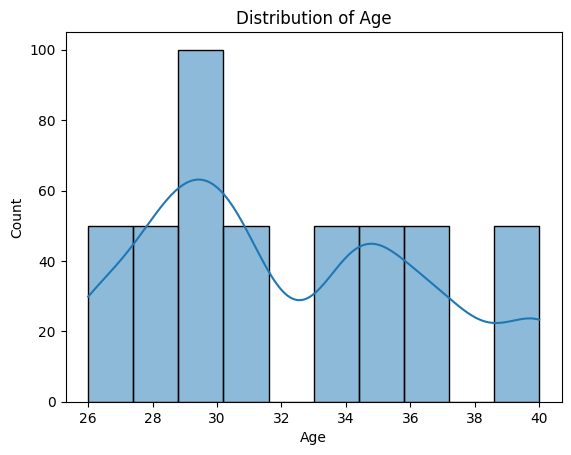

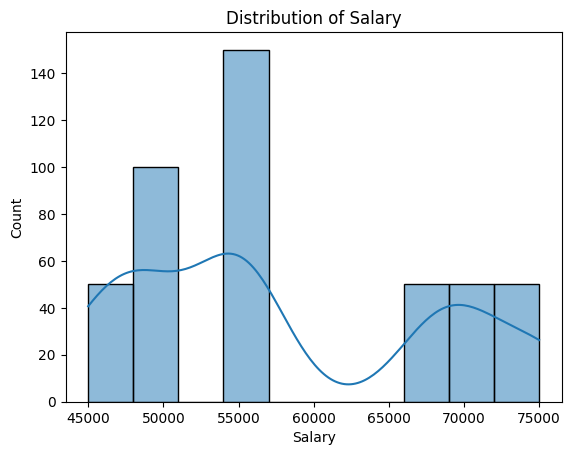

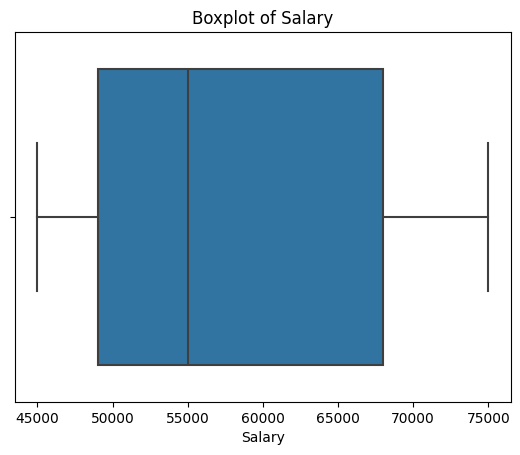

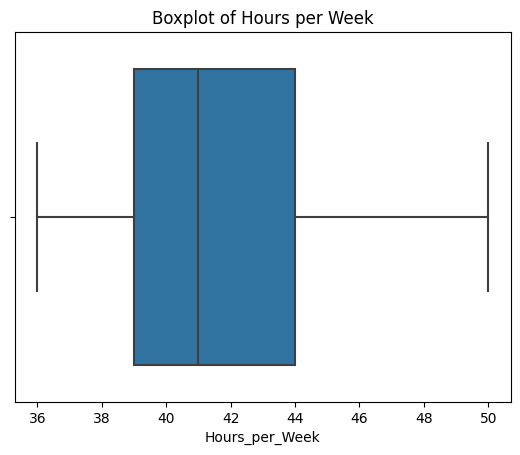

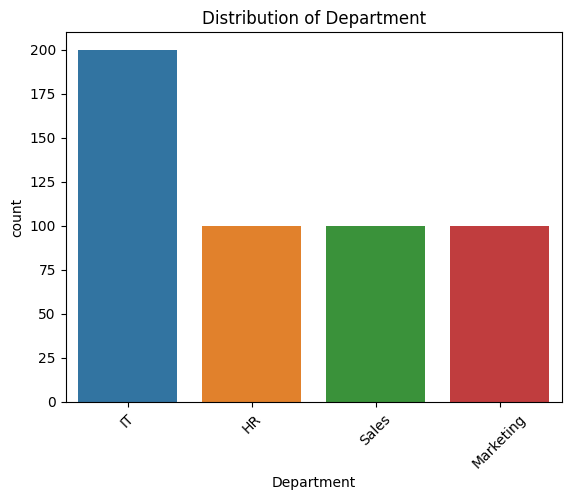

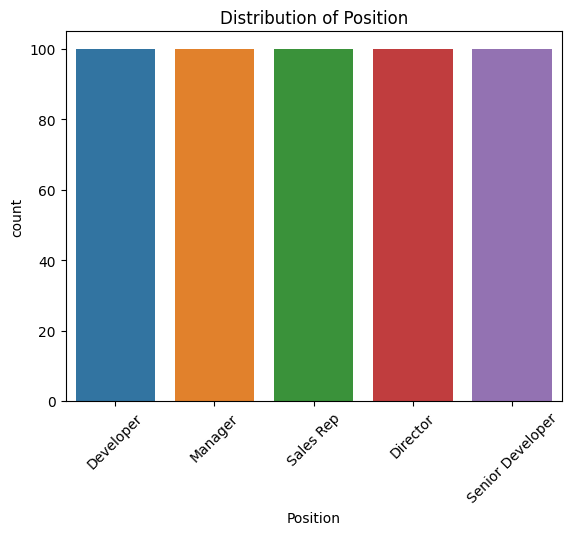

/Users/ismails/opt/anaconda3/envs/Ismail-Project/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


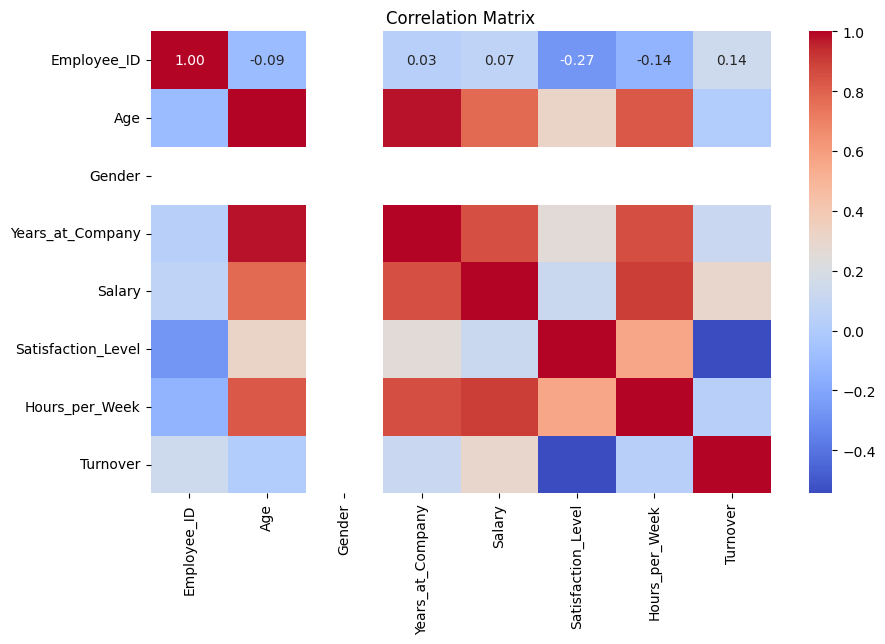

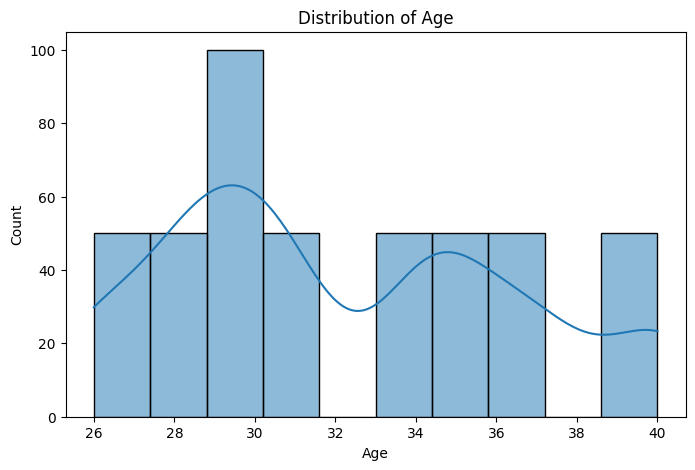

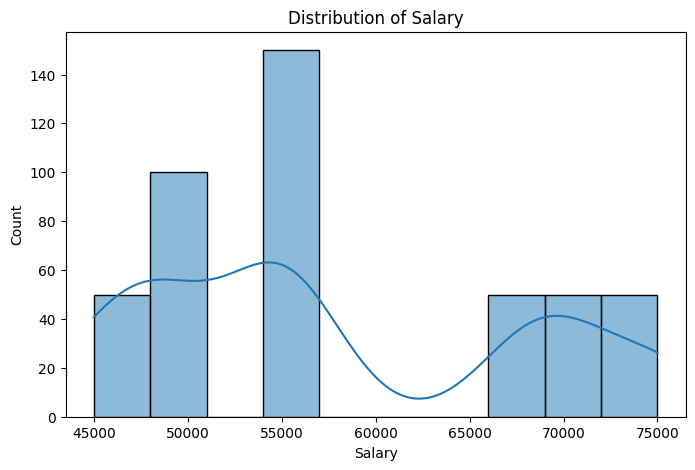

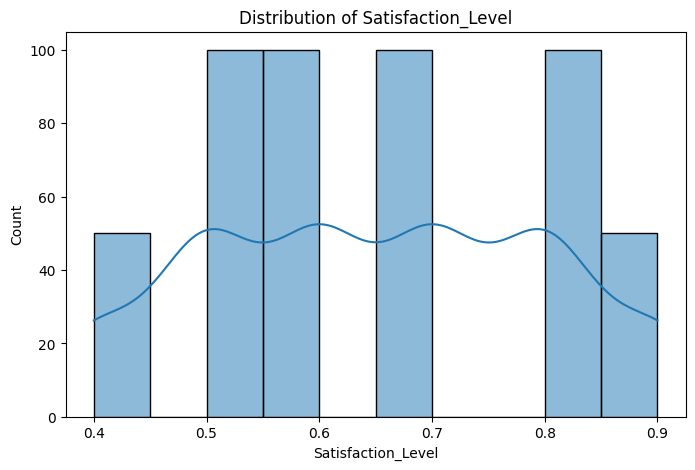

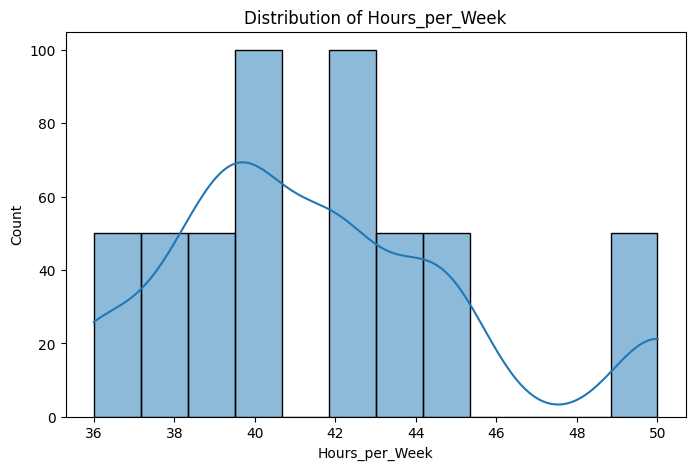

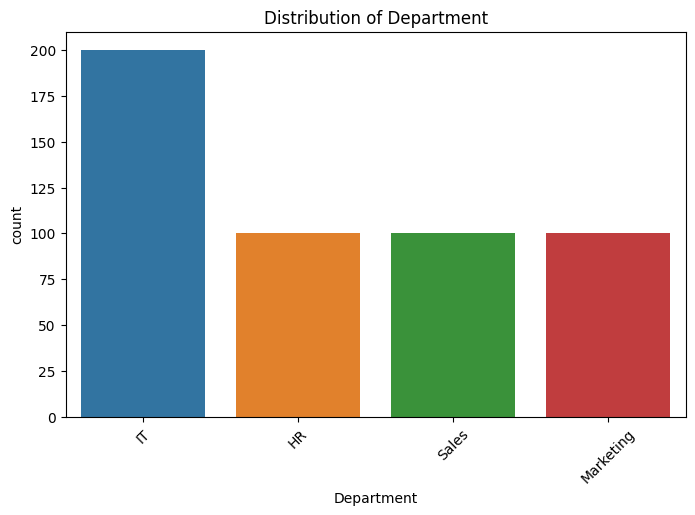

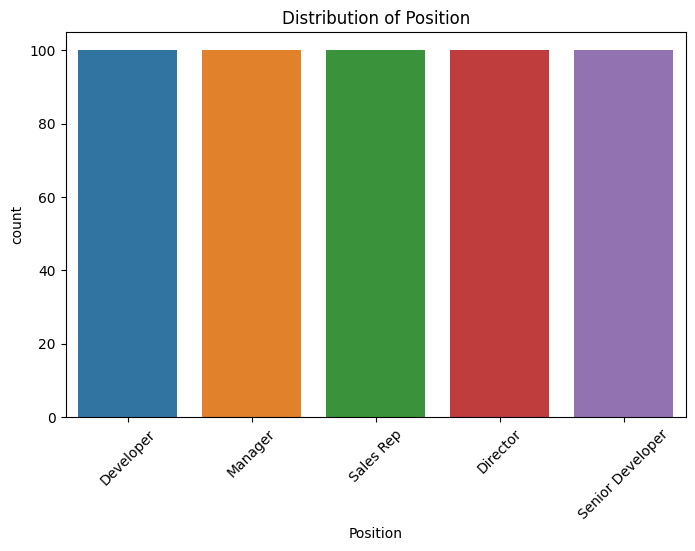

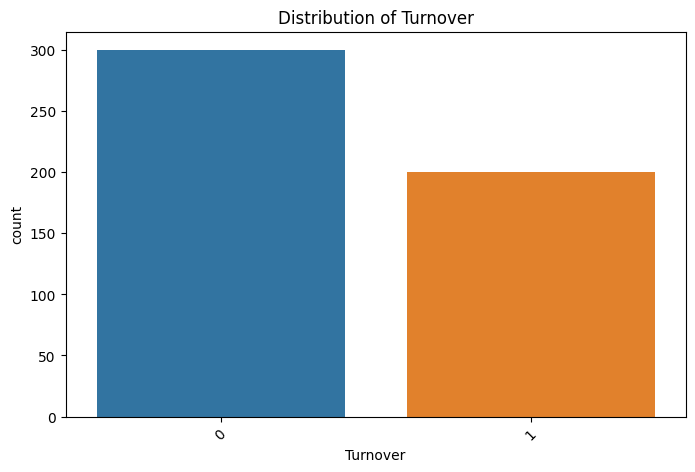

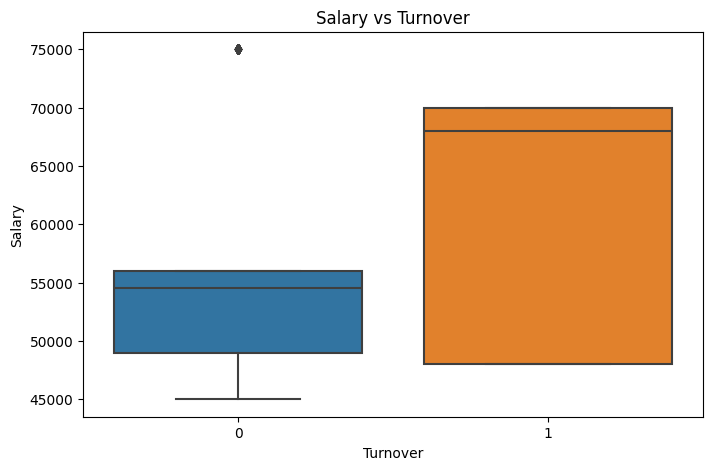

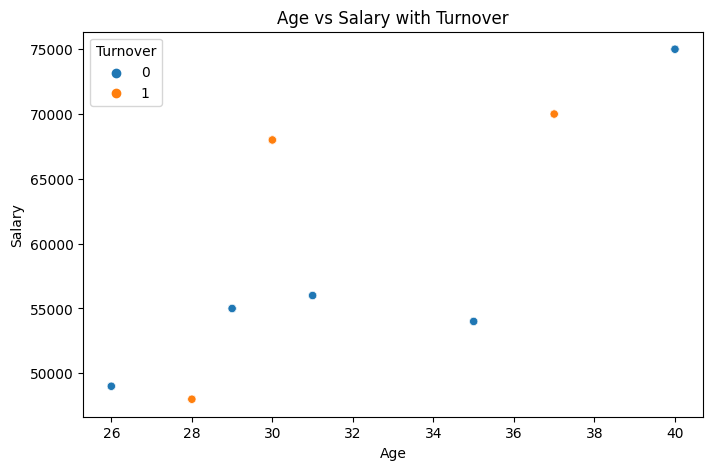

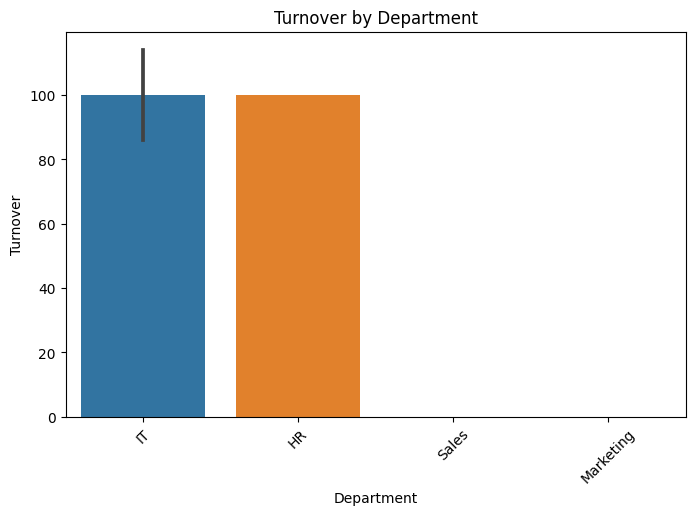

/Users/ismails/opt/anaconda3/envs/Ismail-Project/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


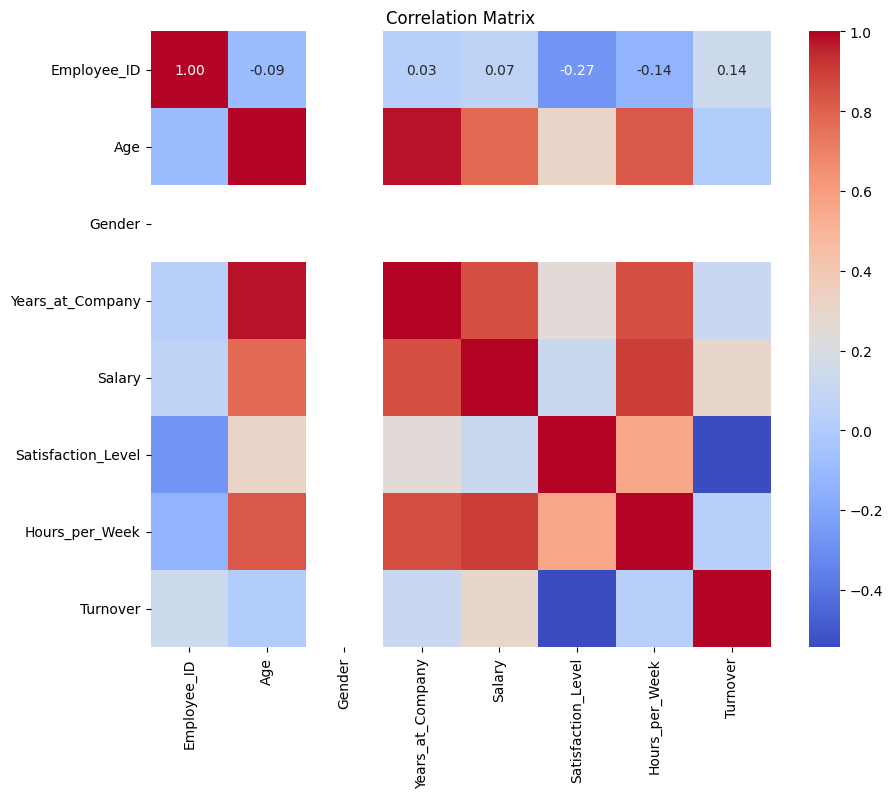

In [24]:
# 7. Analisis Outliers
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import numpy as np

''' 
# Menghitung Z-Score untuk setiap kolom numerik
z_scores = np.abs(zscore(df[numerical_cols]))

# Identifikasi outliers berdasarkan Z-Score > 3
outliers_z = (z_scores > 3)

# Menampilkan kolom yang memiliki outliers
outliers_summary_z = outliers_z.any(axis=0)
outliers_columns_z = numerical_cols[outliers_summary_z]
print("Kolom yang memiliki outliers berdasarkan Z-Score:")
print(outliers_columns_z)

# Menampilkan jumlah outliers per kolom
for col in outliers_columns_z:
    print(f"{col} memiliki {outliers_z[:, numerical_cols.get_loc(col)].sum()} outliers berdasarkan Z-Score")
    #plt.figure(figsize=(8, 4))
    #sns.boxplot(x=df[col])
    #plt.title(f'Boxplot of {col}')
    #plt.show()
'''
    
#ATAU...

# Menghitung Q1 (Kuartil 1) dan Q3 (Kuartil 3)
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengidentifikasi kolom yang memiliki outliers
outliers = ((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound))

# Menampilkan kolom yang memiliki outliers
outliers_summary = outliers.any()
outliers_columns = outliers_summary[outliers_summary].index
print("Kolom yang memiliki outliers:")
print(outliers_columns)

# Menampilkan jumlah outliers per kolom
for col in outliers_columns:
    print(f"{col} memiliki {outliers[col].sum()} outliers")


# 8. Analisis Korelasi
print(df.corr())

# 9. Pemetaan dan Encoding
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# 10. Visualisasi Data
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram untuk distribusi umur
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

# Histogram untuk distribusi Salary
sns.histplot(df['Salary'], kde=True)
plt.title('Distribution of Salary')
plt.show()


# Boxplot untuk fitur Salary
sns.boxplot(x=df['Salary'])
plt.title('Boxplot of Salary')
plt.show()

# Boxplot untuk fitur Hours_per_Week
sns.boxplot(x=df['Hours_per_Week'])
plt.title('Boxplot of Hours per Week')
plt.show()

# Count plot untuk Department
sns.countplot(x='Department', data=df)
plt.title('Distribution of Department')
plt.xticks(rotation=45)
plt.show()

# Count plot untuk Position
sns.countplot(x='Position', data=df)
plt.title('Distribution of Position')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#dan lain lain...
# Visualisasi Data Analisis Univariate dan Bivariate
#Analisis Univariate (Satu Variabel)
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribusi untuk kolom numerik
numerical_cols = ['Age', 'Salary', 'Satisfaction_Level', 'Hours_per_Week']

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Plot distribusi untuk kolom kategorikal
categorical_cols = ['Department', 'Position', 'Turnover']

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Analisis Bivariate (Dua Variabel)
# Boxplot: Salary vs Turnover
plt.figure(figsize=(8, 5))
sns.boxplot(x='Turnover', y='Salary', data=df)
plt.title('Salary vs Turnover')
plt.show()

# Scatter Plot: Age vs Salary   
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Salary', hue='Turnover', data=df)
plt.title('Age vs Salary with Turnover')
plt.show()

#Barplot: Department vs Turnover
plt.figure(figsize=(8, 5))
sns.barplot(x='Department', y='Turnover', data=df, estimator=sum)
plt.title('Turnover by Department')
plt.xticks(rotation=45)
plt.show()

#Heatmap: Korelasi Antar Variabel
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# 11. Membuat Data Dictionary

# Dokumentasikan kolom secara manual atau dengan bantuan tool seperti pandas_profiling




# Transformation Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Simulasi pembacaan data
data = {
    'Employee_ID': [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010] * 50,
    'Name': ['John Smith', 'Jane Doe', 'Emily Davis', 'Michael Brown', 'Jessica Wilson'] * 100,
    'Age': [29, 34, np.nan, 40, 30, 35, 28, 31, 26, 37] * 50,
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'] * 50,
    'Education': ['Bachelor', 'Master', 'Bachelor', 'PhD', 'Master'] * 100,
    'Department': ['IT', 'HR', 'Sales', 'Marketing', 'IT'] * 100,
    'Position': ['Developer', 'Manager', 'Sales Rep', 'Director', 'Senior Developer'] * 100,
    'Years_at_Company': [2, 5, 1, 10, 4, 6, 2, 3, 1, 7] * 50,
    'Salary': [55000, np.nan, 45000, 75000, 68000, 54000, 48000, 56000, 49000, 70000] * 50,
    'Satisfaction_Level': [0.6, 0.8, 0.7, 0.9, 0.5, 0.6, 0.4, 0.7, 0.8, 0.5] * 50,
    'Hours_per_Week': [40, 45, 38, 50, 42, 40, 36, 42, 39, 44] * 50,
    'Performance_Score': ['Good', 'Satisfactory', 'Good', '', 'Satisfactory', 'Good', 'Needs Improvement', 'Satisfactory', 'Good', 'Satisfactory'] * 50,
    'Promotion': ['Yes', 'No', 'No', 'Yes', 'No'] * 100,
    'Turnover': [0, 1, 0, 0, 1, 0, 1, 0, 0, 1] * 50
}

df = pd.DataFrame(data)

# **1. Handling Missing Data**
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())  # Impute missing salaries with mean
df['Age'] = df['Age'].fillna(df['Age'].mean())  # Impute missing ages with mean
df['Performance_Score'] = df['Performance_Score'].replace('', 'Unknown')  # Replace empty strings

# **2. Removing Duplicates**
df = df.drop_duplicates()

# **3. Handling Outliers**
# Example: Cap salaries that are excessively high or low
df['Salary'] = np.where(df['Salary'] > 100000, 100000, df['Salary'])  # Cap high salaries

# **4. Data Formatting and Encoding**
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Education'] = df['Education'].map({'Bachelor': 1, 'Master': 2, 'PhD': 3})
df['Performance_Score'] = df['Performance_Score'].map({'Good': 1, 'Satisfactory': 2, 'Needs Improvement': 3, 'Unknown': 4})

# Encode categorical features
df = pd.get_dummies(df, columns=['Department', 'Position'], drop_first=True)

# **5. Normalizing Data**
scaler = StandardScaler()
df[['Age', 'Years_at_Company', 'Salary', 'Satisfaction_Level', 'Hours_per_Week']] = scaler.fit_transform(
    df[['Age', 'Years_at_Company', 'Salary', 'Satisfaction_Level', 'Hours_per_Week']])

# **6. Split Data**
from sklearn.model_selection import train_test_split

X = df.drop(['Turnover', 'Employee_ID', 'Name'], axis=1)
y = df['Turnover']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)
